In [1]:
import glob
from matplotlib.pyplot import subplots
import pandas

In [2]:
def load_all_matches(video):
    all_matches = []
    for i, filename in enumerate(sorted(glob.glob('data/%s.*.csv' % video)), 1):
        df = pandas.read_csv(filename)
        df['match'] = 'match %d' % i
        all_matches.append(df)
    all_matches = pandas.concat(all_matches, axis=0)
    return all_matches

In [3]:
# Load all matches for the March 27 North America tournament
march27 = load_all_matches('2021-03-27_965657358')
march27

,frame,player name,weapon 1,weapon 2,match
0,846,SungNguyenn,HEMLOK,NaN,match 1
1,847,SungNguyenn,HEMLOK,NaN,match 1
2,848,SungNguyenn,HEMLOK,R-99,match 1
3,849,SungNguyenn,HEMLOK,R-99,match 1
4,850,BlurrFlavorz_RX,SPITFIRE,ALTERNATOR,match 1
...,...,...,...,...,...
519,8175,TSM_ImperialHa1,SPITFIRE,MASTIFF,match 7
520,8176,TSM_ImperialHa1,SPITFIRE,MASTIFF,match 7
521,8177,TSM_ImperialHa1,SPITFIRE,MASTIFF,match 7
522,8178,TSM_ImperialHa1,SPITFIRE,MASTIFF,match 7


In [4]:
def get_weapons(df, nb):
    col_name = 'weapon %d' % nb
    df = df[['player name', col_name]]
    df = df.rename(columns={col_name: 'weapon'})
    df = df[~pandas.isna(df['weapon'])]
    return df

In [5]:
march27_weapons = pandas.concat(
    [
        get_weapons(march27, 1),
        get_weapons(march27, 2),
    ],
    axis=0,
)

In [6]:
colors = {
    '#ff4b26': ['EVA-8 AUTO', 'MASTIFF', 'MOZAMBIQUE', 'PEACEKEEPER'],
    '#ad7d51': ['R-301', 'G7 SCOUT', 'R-99', 'ALTERNATOR', 'RE-45', 'P2020'],
    '#d0e354': ['VOLT', 'L-STAR', 'DEVOTION', 'HAVOC'],
    '#31cc92': ['FLATLINE', 'WINGMAN', 'SPITFIRE', 'HEMLOK', '30-30 REPEATER', 'PROWLER'],
    '#3c33a7': ['TRIPLE TAKE', 'CHARGE RIFLE', 'SENTINEL', 'KRABER', 'LONGBOW'],
}
weapon_color = {}
for c, ns in colors.items():
    for n in ns:
        weapon_color[n] = c

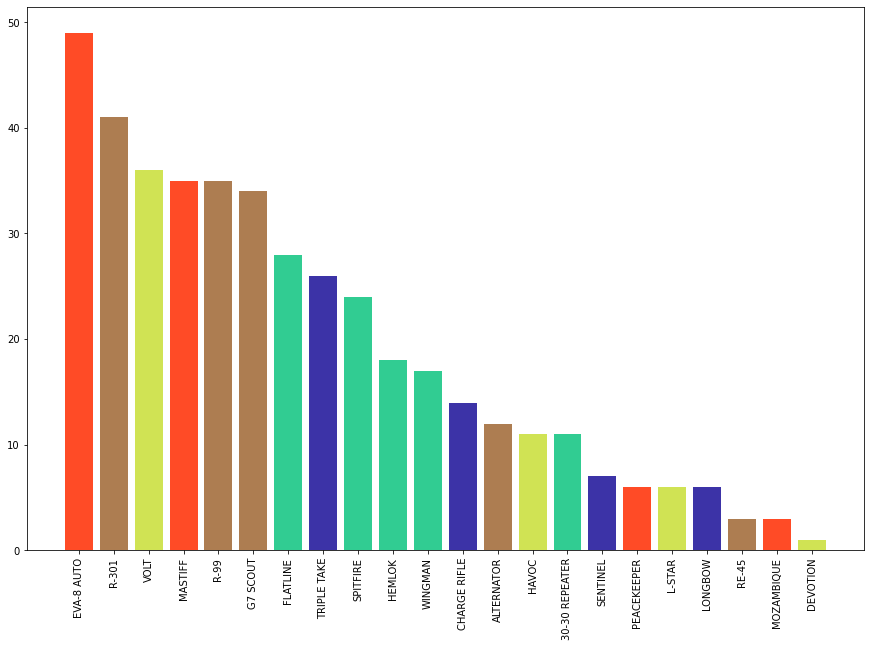

In [7]:
weapons = march27_weapons.drop_duplicates()['weapon'].value_counts()
fig, ax = subplots(figsize=(15, 10))
ax.bar(
    range(len(weapons)),
    weapons,
    color=[weapon_color[n] for n in weapons.index],
)
ax.set_xticks(range(len(weapons)))
ax.set_xticklabels(weapons.index, rotation='vertical')
None

In [8]:
march28 = load_all_matches('2021-03-28_966453340')
march28

,frame,player name,weapon 1,weapon 2,match
0,925,7xaniya,NaN,NaN,match 1
1,926,7xaniya,NaN,NaN,match 1
2,927,7xaniya,NaN,NaN,match 1
3,928,7xaniya,NaN,NaN,match 1
4,929,7xaniya,NaN,NaN,match 1
...,...,...,...,...,...
511,7069,FotM_Pjeh,FLATLINE,MASTIFF,match 5
512,7071,FotM_nothFPS,EVA-8 AUTO,R-301,match 5
513,7072,FotM_nothFPS,EVA-8 AUTO,R-301,match 5
514,7073,FotM_nothFPS,EVA-8 AUTO,R-301,match 5


In [9]:
march28_weapons = pandas.concat(
    [
        get_weapons(march28, 1),
        get_weapons(march28, 2),
    ],
    axis=0,
)

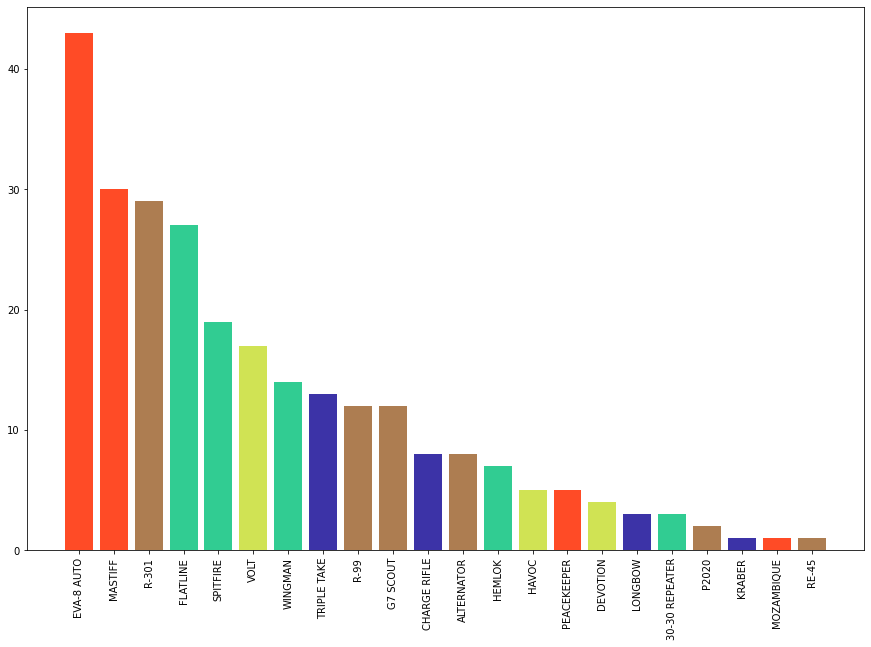

In [10]:
weapons = march28_weapons.drop_duplicates()['weapon'].value_counts()
fig, ax = subplots(figsize=(15, 10))
ax.bar(
    range(len(weapons)),
    weapons,
    color=[weapon_color[n] for n in weapons.index],
)
ax.set_xticks(range(len(weapons)))
ax.set_xticklabels(weapons.index, rotation='vertical')
None